# 욜로(YOLO)를 이용한 이미지 객체 인식

In [3]:
# 필요한 패키지와 모듈을 불러온다.

import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
# OpenCV 2.4 이상 버전이 필요하다.

print("OpenCV Version !!! ")
print(cv2.__version__)

OpenCV Version !!! 
4.7.0


In [1]:
# 내 구글 드라이브에 연동

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### yolov3.weights 파일 다운로드, 현재작업 경로 아래의 config 폴더로 이동

In [ ]:
# yolov3.weights 파일 다운로드

from urllib.request import urlretrieve

urlretrieve('https://pjreddie.com/media/files/yolov3.weights','yolov3.weights')

('yolov3.weights', <http.client.HTTPMessage at 0x7b560bd257e0>)

In [ ]:
# 구글 드라이버로 다운로드된 'yolov3.weights' 파일 확인

!ls

gdrive	sample_data  yolov3.weights


In [ ]:
# 내 구글 드라이브로 yolov3.weights 파일 이동

!mv yolov3.weights gdrive/My\ Drive/CV/Object\ Detection_YOLO/config/
print('yolov3.weights move complete!!')

yolov3.weights move complete!!


### yolov3-tiny.weights 파일 다운로드, 현재작업 경로 아래의 config 폴더로 이동

In [ ]:
# YOLOv3-tiny 가중치 파일
#  - yolov3-tiny.weights 파일 다운로드

from urllib.request import urlretrieve

urlretrieve('https://pjreddie.com/media/files/yolov3-tiny.weights','yolov3-tiny.weights')

('yolov3-tiny.weights', <http.client.HTTPMessage at 0x7b55dcda0160>)

In [ ]:
# 구글 드라이버로 다운로드된 'yolov3-tiny.weights' 파일 확인

!ls

gdrive	sample_data  yolov3-tiny.weights


In [ ]:
# 내 구글 드라이브로 yolov3-tiny.weights 파일 이동

!mv yolov3-tiny.weights gdrive/My\ Drive/CV/Object\ Detection_YOLO/config/
print('yolov3-tiny.weights move complete!!')

yolov3-tiny.weights move complete!!


### darknet에서 yolov3.cfg/yolov3-tiny.cfg/coco.names 파일을 다운로드

In [ ]:
# darknet에서 yolov3.cfg/yolov3-tiny.cfg/coco.names 파일을 다운로드

# Colab에서 GitHub 에 있는 데이터 가져오기
# 다운로드 할 수 있는 URL : https://github.com/pjreddie/darknet Clone Web URL 를 복사해 옵니다.

!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


In [ ]:
# GitHub로부터 다운로드된 'darnet' dataset 폴더 확인

!ls

darknet  gdrive  sample_data


In [ ]:
#  darknet/cfg/ 폴더 파일 확인

!ls darknet/cfg/

alexnet.cfg	     imagenet1k.data		   vgg-16.cfg
cifar.cfg	     imagenet22k.dataset	   vgg-conv.cfg
cifar.test.cfg	     imagenet9k.hierarchy.dataset  voc.data
coco.data	     jnet-conv.cfg		   writing.cfg
combine9k.data	     openimages.data		   yolo9000.cfg
darknet19_448.cfg    resnet101.cfg		   yolov1.cfg
darknet19.cfg	     resnet152.cfg		   yolov1-tiny.cfg
darknet53_448.cfg    resnet18.cfg		   yolov2.cfg
darknet53.cfg	     resnet34.cfg		   yolov2-tiny.cfg
darknet9000.cfg      resnet50.cfg		   yolov2-tiny-voc.cfg
darknet.cfg	     resnext101-32x4d.cfg	   yolov2-voc.cfg
densenet201.cfg      resnext152-32x4d.cfg	   yolov3.cfg
extraction22k.cfg    resnext50.cfg		   yolov3-openimages.cfg
extraction.cfg	     rnn.cfg			   yolov3-spp.cfg
extraction.conv.cfg  rnn.train.cfg		   yolov3-tiny.cfg
go.cfg		     strided.cfg		   yolov3-voc.cfg
go.test.cfg	     t1.test.cfg
gru.cfg		     tiny.cfg


In [ ]:
#  darknet/data/ 폴더 파일 확인

!ls darknet/data/

9k.labels   coco.names	 goal.txt		   inet9k.map	     person.jpg
9k.names    dog.jpg	 horses.jpg		   kite.jpg	     scream.jpg
9k.tree     eagle.jpg	 imagenet.labels.list	   labels	     voc.names
coco9k.map  giraffe.jpg  imagenet.shortnames.list  openimages.names


In [ ]:
#  GitHub로부터 다운로드된 'darnet' dataset에서 필요한 파일만 복사 한다.

!cp darknet/cfg/yolov3.cfg gdrive/My\ Drive/CV/Object\ Detection_YOLO/config/
print('yolov3.cfg copy complete!!')

!cp darknet/cfg/yolov3-tiny.cfg gdrive/My\ Drive/CV/Object\ Detection_YOLO/config/
print('yolov3-tiny.cfg copy complete!!')

!cp darknet/data/coco.names gdrive/My\ Drive/CV/Object\ Detection_YOLO/config/
print('coco.names copy complete!!')

yolov3.cfg copy complete!!
yolov3-tiny.cfg copy complete!!
coco.names copy complete!!


In [ ]:
# 내 구글 드라이브의 gdrive/My\ Drive/CV/Object\ Detection_YOLO/config/ 폴더 파일 확인

!ls gdrive/My\ Drive/CV/Object\ Detection_YOLO/config

coco.names  yolov3.cfg	yolov3-tiny.cfg  yolov3-tiny.weights  yolov3.weights


In [ ]:
# 다운로드 받았던 폴더(파일)를 제거한다.

!rm -r darknet

In [ ]:
# 내 구글 드라이브 확인

!ls

gdrive	sample_data


### 하이퍼파라미터 설정

In [ ]:
# detection 으로 인정할 최소 확률(신뢰도) 지정
#  - 여기서 최소 확률(신뢰도)을 50%로 지정

min_confidence = 0.5

# **YOLOv3**

In [ ]:
# Load YOLOv3
# 미리 학습된 딥러닝 파일을 OpenCV DNN 모듈로 YOLO 네트워크 연결
# 순전파(추론)만 가능하며 학습은 지원하지 않는다.

net = cv2.dnn.readNet("gdrive/My Drive/CV/Object Detection_YOLO/config/yolov3.weights",
                      "gdrive/My Drive/CV/Object Detection_YOLO/config/yolov3.cfg")

In [ ]:
# YOLO 인공신경망 계층 이름을 출력

layer_names = net.getLayerNames()
print("layer_names len:", len(layer_names))   # layer_names len: 254
print("layer_names:", layer_names)            # layer_names: ('conv_0', 'bn_0', 'leaky_1', 'conv_1', ...

layer_names len: 254
layer_names: ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcu

In [ ]:
# getUnconnectedOutLayers() : 인공신경망 네트워크의 마지막 레이어로 인식되는 연결되어 있지 않은 출력 레이어의 인덱스를 제공하는 함수이다.

# Get the names of output layers
# 인공신경망 네트워크의 마지막 레이어로 인식되는 연결되어 있지 않은 출력 레이어의 인덱스 확인
print("net.getUnconnectedOutLayers() len", len(net.getUnconnectedOutLayers()))  # net.getUnconnectedOutLayers() len 3
print(net.getUnconnectedOutLayers())                                            # [200 227 254]

# 레이어 중 출력 레이어의 인덱스를 가져와서 출력한다.
print([layer_names[i-1] for i in net.getUnconnectedOutLayers()])                # ['yolo_82', 'yolo_94', 'yolo_106']

# 레이어 중 출력 레이어의 인덱스를 가져와서 output_layers에 넣는다.
output_layers = []
try:
  output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
except(Exception):  # 모든 에러 처리
  print("")

print("output_layers len:", len(output_layers))                                 # output_layers len: 3
print("output_layers:", output_layers)                                          # output_layers: ['yolo_82', 'yolo_94', 'yolo_106']

net.getUnconnectedOutLayers() len 3
[200 227 254]
['yolo_82', 'yolo_94', 'yolo_106']
output_layers len: 3
output_layers: ['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
# detection 할 Object(Class) list 배열을 정의
classes = []

# 80개의 Object(class)를 구분할 수 있는 Object의 이름을 classes 배열에 넣어준다.
with open("gdrive/My Drive/CV/Object Detection_YOLO/config/coco.names", "r") as f:
  # 클래스 이름의 공백을 제거하여 classes 리스트에 넣는다.
   classes = [line.strip() for line in f.readlines()]
print("classes len:", len(classes))                       # classes len: 80
print("classes:", classes)                                # classes: ['person', 'bicycle', 'car', 'motorbike', ...

classes len: 80
classes: ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
# Object 마다 컬러를 하나씩 다르게 지정
colors = np.random.uniform(0, 255, size=(len(classes), 3))
print("colors shape:", colors.shape)   # colors shape: (80, 3)
print("colors:", colors[0:5])

colors shape: (80, 3)
colors: [[235.01093963 208.07098746 208.44801734]
 [219.59544969 137.54002927  64.0908944 ]
 [103.78250542  61.70933444 112.32695409]
 [105.3773565  182.90243816 207.76884854]
 [ 70.79845131 145.8140631  132.33892235]]


image.shape : (431, 814, 3)


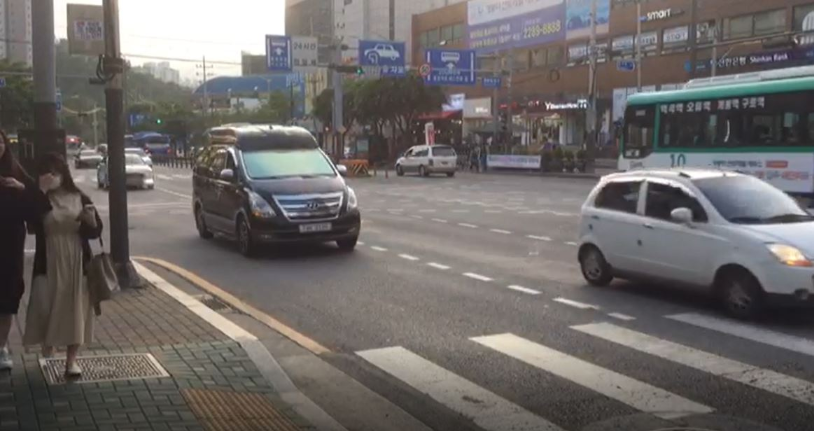

In [4]:
# 원본이미지를 읽어 온다.

img = cv2.imread("gdrive/My Drive/CV/Object Detection_YOLO/image/Street.jpg")
img = cv2.resize(img, None, fx=0.7, fy=0.7)
height, width, channels = img.shape
print("image.shape :", img.shape)           # image.shape : (431, 814, 3)

cv2_imshow(img)                             # 원본 이미지 출력

In [ ]:
# cv2.dnn.blobFromImage() : 네트워크, 입력 블롭(blob) 만들기
# YOLOv3의 Detecting model 3가지(320×320, 416×416, 608×608)
# 이미지 데이터 전처리([0,255] --> 픽셀에 0.00392 값을 곱해준다)

# 영상의 전처리
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
print("image.shape :", img.shape)     # image.shape : (431, 814, 3)
print(img[:3, :3, ])
print("blob.shape :", blob.shape)     # blob.shape : (1, 3, 416, 416)
print(blob[:, :, :3, :3])

image.shape : (431, 814, 3)
[[[152 151 153]
  [145 146 147]
  [142 144 145]]

 [[152 150 152]
  [146 147 148]
  [142 144 146]]

 [[149 148 150]
  [145 146 147]
  [144 146 147]]]
blob.shape : (1, 3, 416, 416)
[[[[0.588      0.56448    0.48608   ]
   [0.588      0.56448    0.48608   ]
   [0.58016    0.5684     0.49392   ]]

  [[0.58016    0.55272    0.4704    ]
   [0.58016    0.55272    0.4704    ]
   [0.57624    0.56056    0.47432   ]]

  [[0.58016    0.5488     0.46648002]
   [0.58408    0.5488     0.46648002]
   [0.57624    0.55272    0.4704    ]]]]


In [ ]:
# setInput() : 네트워크 입력 설정하기
net.setInput(blob)                   # 네트워크에 전처리된 영상 입력 설정

# forward() : 네트워크 순방향 실행(추론)
# - outs에 detection 된 Object들이 있다.
outs = net.forward(output_layers)    # 네트워크 순방향 추론 (output_layers:['yolo_82','yolo_94','yolo_106'])
print("np.array(outs).shape :", np.array(outs).shape)        # np.array(outs).shape : (3,)
print("np.array(outs)[0].shape :", np.array(outs)[0].shape)  # np.array(outs)[0].shape : (507, 85)
print("np.array(outs)[1].shape :", np.array(outs)[1].shape)  # np.array(outs)[1].shape : (2028, 85)
print("np.array(outs)[2].shape :", np.array(outs)[2].shape)  # np.array(outs)[2].shape : (8112, 85)

np.array(outs).shape : (3,)
np.array(outs)[0].shape : (507, 85)
np.array(outs)[1].shape : (2028, 85)
np.array(outs)[2].shape : (8112, 85)


<ipython-input-33-2862d8088671>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print("np.array(outs).shape :", np.array(outs).shape)        # np.array(outs).shape : (3,)
<ipython-input-33-2862d8088671>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print("np.array(outs)[0].shape :", np.array(outs)[0].shape)  # np.array(outs)[0].shape : (507, 85)
<ipython-input-33-2862d8088671>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is

In [ ]:
# outs 객체의 0번째 인덱스 값을 출력
#  - 506행, 0~9열 행렬 값을 출력
print("np.array(outs).shape :", np.array(outs).shape)        # np.array(outs).shape : (3,)
print("np.array(outs)[0].shape :", np.array(outs)[0].shape)  # np.array(outs)[0].shape : (507, 85)
print(outs[0][506:507,0:10])
# [[9.7039163e-01 9.6014607e-01 8.1518787e-01 8.1216145e-01 2.1700609e-08 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]

np.array(outs).shape : (3,)
np.array(outs)[0].shape : (507, 85)
[[9.7039163e-01 9.6014607e-01 8.1518787e-01 8.1216145e-01 2.1700609e-08
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [ ]:
# Showing informations on the screen

class_ids = []     # detection 한 Class id를 저장하는 배열 정의
confidences = []   # detection 한 Class 의 신뢰도(확률)를 저장하는 배열 정의
boxes = []         # detection 한 boxing 정보를 저장하는 배열 정의

for out in outs:                        # outs: (3,) ==> (507, 85) (2028, 85) (8112, 85)
    for detection in out:               # (507, 85) (2028, 85) (8112, 85)
        scores = detection[5:]
        class_id = np.argmax(scores)    # detection 한 Class id : 80개 사물중 가장 높은 확률
        confidence = scores[class_id]   # detection 한 Class 의 신뢰도(확률)
        if confidence > min_confidence: # 최소 확률(신뢰도)을 50%로 지정
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])             # boxing 정보를 boxes 배열에 저장
            confidences.append(float(confidence))  # 신뢰도(확률)을 confidences 배열에 저장
            class_ids.append(class_id)             # Class id 를 class_ids 배열에 저장

In [ ]:
# apply non-max suppression

# 비최대 억제(Non-Maximum Suppression, NMS) 알고리즘을 적용해 주위 바운딩 박스에 비해 최대를 유지한 것 인덱스 확인한다.
#  - 박스안에 박스(노이즈)를 하나로 만들어 준다.

# 이 값이 클수록 box가 많이 사라진다(즉, 조금낭 겹쳐도 NMS로 둘 중 하나를 삭제하기 때문)
nms_threshold = 0.4

# 최종 선정된 Bbox 인덱스 결과(노이즈가 제거된 박스만 표시해 준다)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, nms_threshold)
print("indexes:", indexes)            # indexes:[ 9  4 26 27  1 21 19 24]

indexes: [ 9  4 26 27  1 21 19 24]


1 bus 0.944
4 car 0.983
9 car 0.994
19 person 0.630
21 person 0.916
24 car 0.543
26 car 0.978
27 car 0.974


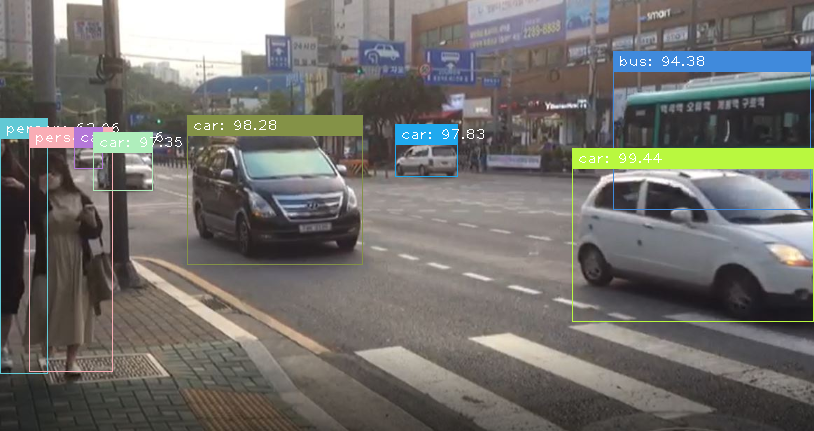

In [ ]:
# 결과 이미지 출력

font = cv2.FONT_HERSHEY_PLAIN                 # 폰트 설정

for i in range(len(boxes)):                   # 최종 선별한 Bbox 개수 만큼 반복
    if i in indexes:                          # 노이즈가 제거된 박스만 표시해 준다.
        x, y, w, h = boxes[i]
        label = "{}: {:.2f}".format(classes[class_ids[i]], confidences[i]*100)   # Class 이름, 신뢰도(확률) 표시
        #label = str(classes[class_ids[i]])   # Class 이름
        text_confidence = str(classes[class_ids[i]])+' '+'%.3f'%confidences[i]   # Class 신뢰도(확률) 표시
        print(i, text_confidence)
        #print(i, label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
        cv2.rectangle(img, (x, y - 20), (x + w, y), color, -1)
        cv2.putText(img, label, (x + 5, y - 5), font, 1, (255, 255, 255), 1)

cv2_imshow(img)

# **YOLOv3**-tiny

In [ ]:
# Load YOLOv3-tiny
# 미리 학습된 딥러닝 파일을 OpenCV DNN 모듈로 실행
# 순전파(추론)만 가능하며 학습은 지원하지 않는다.

net = cv2.dnn.readNet("gdrive/My Drive/CV/Object Detection_YOLO/config/yolov3-tiny.weights",
                      "gdrive/My Drive/CV/Object Detection_YOLO/config/yolov3-tiny.cfg")

In [ ]:
# YOLO 인공신경망 계층 이름을 출력

layer_names = net.getLayerNames()
print("layer_names len:", len(layer_names))   # layer_names len: 48
print("layer_names:", layer_names)            # layer_names: ('conv_0', 'bn_0', 'leaky_1',  ...

layer_names len: 48
layer_names: ('conv_0', 'bn_0', 'leaky_1', 'pool_1', 'conv_2', 'bn_2', 'leaky_3', 'pool_3', 'conv_4', 'bn_4', 'leaky_5', 'pool_5', 'conv_6', 'bn_6', 'leaky_7', 'pool_7', 'conv_8', 'bn_8', 'leaky_9', 'pool_9', 'conv_10', 'bn_10', 'leaky_11', 'pool_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'conv_15', 'permute_16', 'yolo_16', 'identity_17', 'conv_18', 'bn_18', 'leaky_19', 'upsample_19', 'concat_20', 'conv_21', 'bn_21', 'leaky_22', 'conv_22', 'permute_23', 'yolo_23')


In [ ]:
# getUnconnectedOutLayers() : 인공신경망 네트워크의 마지막 레이어로 인식되는 연결되어 있지 않은 출력 레이어의 인덱스를 제공하는 함수이다.

# Get the names of output layers

# 인공신경망 네트워크의 마지막 레이어로 인식되는 연결되어 있지 않은 출력 레이어의 인덱스 확인
print("net.getUnconnectedOutLayers() len", len(net.getUnconnectedOutLayers()))  # net.getUnconnectedOutLayers() len 2
print(net.getUnconnectedOutLayers())                                            # [36 48]

# 레이어 중 출력 레이어의 인덱스를 가져와서 출력한다.
print([layer_names[i-1] for i in net.getUnconnectedOutLayers()])                # ['yolo_16', 'yolo_23']

# 레이어 중 출력 레이어의 인덱스를 가져와서 output_layers에 넣는다.
output_layers = []
try:
  output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
except(Exception):  # 모든 에러 처리
  print("")

print("output_layers len:", len(output_layers))                                 # output_layers len: 2
print("output_layers:", output_layers)                                          # ['yolo_16', 'yolo_23']

net.getUnconnectedOutLayers() len 2
[36 48]
['yolo_16', 'yolo_23']
output_layers len: 2
output_layers: ['yolo_16', 'yolo_23']


In [ ]:
# detection 할 Object(Class) list 배열을 정의
classes = []

# 80개의 Object(class)를 구분할 수 있는 Object의 이름을 classes 배열에 넣어준다.
with open("gdrive/My Drive/CV/Object Detection_YOLO/config/coco.names", "r") as f:
  # 클래스 이름의 공백을 제거하여 classes 리스트에 넣는다.
   classes = [line.strip() for line in f.readlines()]
print("classes len:", len(classes))                   # classes len: 80
print("classes:", classes)                            # classes: ['person', 'bicycle', 'car', 'motorbike', 'aeroplane',

classes len: 80
classes: ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
# Object 마다 컬러를 하나씩 다르게 지정
colors = np.random.uniform(0, 255, size=(len(classes), 3))
print("colors len:", len(colors))       # colors len: 80
print("colors:", colors[0:5])

colors len: 80
colors: [[232.62123879 209.33101068  64.96246581]
 [214.87962606 165.16268665 150.0376439 ]
 [246.50614099 190.76628746 197.34355335]
 [185.77384584 220.55158863   2.51313905]
 [ 87.438194    19.78716345 126.64999703]]


image.shape : (431, 814, 3)


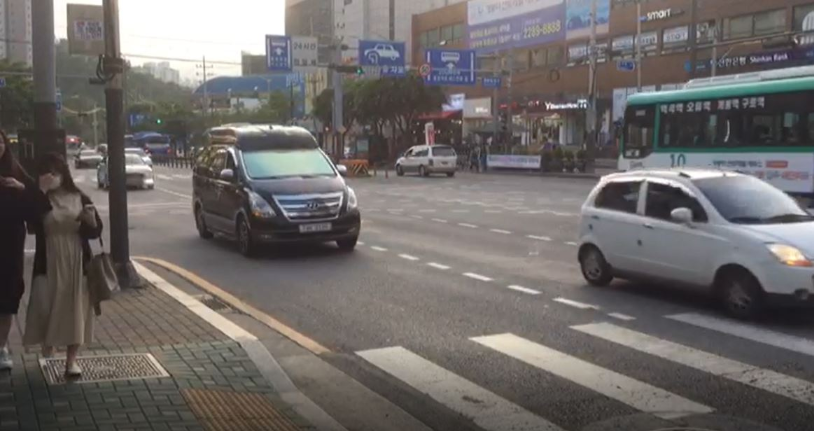

In [5]:
# 원본이미지를 읽어 온다.

img = cv2.imread("gdrive/My Drive/CV/Object Detection_YOLO/image/Street.jpg")
img = cv2.resize(img, None, fx=0.7, fy=0.7)
height, width, channels = img.shape
print("image.shape :", img.shape)        # image.shape : (431, 814, 3)

cv2_imshow(img)                          # 원본 이미지 출력

In [ ]:
# cv2.dnn.blobFromImage() : 네트워크, 입력 블롭(blob) 만들기
# YOLOv3의 Detecting model 3가지(320×320, 416×416, 608×608)
# 이미지 데이터 전처리([0,255] --> 픽셀에 0.00392 값을 곱해준다)

# 영상의 전처리
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
print("image.shape :", img.shape)   # image.shape: (431, 814, 3)-(H,W,C)
print(img[:3, :3, ])
print("blob.shape :", blob.shape)   # blob.shape: (1,3,416,416)-(N,C,H,W)
print(blob[:, :, :3, :3])

image.shape : (431, 814, 3)
[[[152 151 153]
  [145 146 147]
  [142 144 145]]

 [[152 150 152]
  [146 147 148]
  [142 144 146]]

 [[149 148 150]
  [145 146 147]
  [144 146 147]]]
blob.shape : (1, 3, 416, 416)
[[[[0.588      0.56448    0.48608   ]
   [0.588      0.56448    0.48608   ]
   [0.58016    0.5684     0.49392   ]]

  [[0.58016    0.55272    0.4704    ]
   [0.58016    0.55272    0.4704    ]
   [0.57624    0.56056    0.47432   ]]

  [[0.58016    0.5488     0.46648002]
   [0.58408    0.5488     0.46648002]
   [0.57624    0.55272    0.4704    ]]]]


In [ ]:
# setInput() : 네트워크 입력 설정하기
net.setInput(blob)                    # 네트워크에 전처리된 영상 입력 설정

# forward() : 네트워크 순방향 실행(추론)
# - outs 에 detection 된 Object 들이 들어 있다.
outs = net.forward(output_layers)    # 네트워크 순방향 추론(output_layers:['yolo_16', 'yolo_23'])
print("np.array(outs).shape :", np.array(outs).shape)       # (2,)
print("np.array(outs)[0].shape :", np.array(outs)[0].shape) # (507, 85)
print("np.array(outs)[1].shape :", np.array(outs)[1].shape) # (2028, 85)

np.array(outs).shape : (2,)
np.array(outs)[0].shape : (507, 85)
np.array(outs)[1].shape : (2028, 85)


<ipython-input-47-06f798c54e2c>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print("np.array(outs).shape :", np.array(outs).shape)       # (2,)
<ipython-input-47-06f798c54e2c>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print("np.array(outs)[0].shape :", np.array(outs)[0].shape) # (507, 85)
<ipython-input-47-06f798c54e2c>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spec

In [ ]:
# outs 객체의 0번째 인덱스 값을 출력
#  - 506행, 0~9열 행렬 값을 출력
print("np.array(outs).shape :", np.array(outs).shape)        # np.array(outs).shape : (2,)
print("np.array(outs)[0].shape :", np.array(outs)[0].shape)  # np.array(outs)[0].shape : (507, 85)
print(outs[0][506:507,0:10])
# [[9.6677363e-01 9.5592797e-01 7.5573349e-01 6.5449971e-01 3.1039008e-08 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]

np.array(outs).shape : (2,)
np.array(outs)[0].shape : (507, 85)
[[9.6677363e-01 9.5592797e-01 7.5573349e-01 6.5449971e-01 3.1039008e-08
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


<ipython-input-48-b32a5784a864>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print("np.array(outs).shape :", np.array(outs).shape)
<ipython-input-48-b32a5784a864>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print("np.array(outs)[0].shape :", np.array(outs)[0].shape)


In [ ]:
# Showing informations on the screen

class_ids = []     # detection 한 Class id를 저장하는 배열 정의
confidences = []   # detection 한 Class 의 신뢰도(확률)를 저장하는 배열 정의
boxes = []         # detection 한 boxing 정보를 저장하는 배열 정의

for out in outs:                        # outs : (2,) ==> (507, 85) (2028, 85)
    for detection in out:               # (507, 85) (2028, 85)
        scores = detection[5:]
        class_id = np.argmax(scores)    # detection 한 Class id : 80개 사물중 가장 높은 확률
        confidence = scores[class_id]   # detection 한 Class 의 신뢰도(확률)
        if confidence > min_confidence: # 최소 확률(신뢰도)을 50%로 지정
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])             # boxing 정보를 boxes 배열에 저장
            confidences.append(float(confidence))  # 신뢰도(확률)을 confidences 배열에 저장
            class_ids.append(class_id)             # Class id 를 class_ids 배열에 저장

In [ ]:
# apply non-max suppression

# 비최대 억제(Non-Maximum Suppression, NMS) 알고리즘을 적용해 주위 바운딩 박스에 비해 최대를 유지한 것 인덱스 확인한다.
#  - 박스안에 박스(노이즈)를 하나로 만들어 준다.

# 이 값이 클수록 box가 많이 사라진다(즉, 조금낭 겹쳐도 NMS로 둘 중 하나를 삭제하기 때문)
nms_threshold = 0.4

# 최종 선정된 Bbox 인덱스 결과(노이즈가 제거된 박스만 표시해 준다)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, nms_threshold)
print("indexes:", indexes)             # indexes: [4 1 5 7 0]

indexes: [4 1 5 7 0]


0 bus 0.822
1 car 0.916
4 car 0.950
5 car 0.842
7 car 0.829


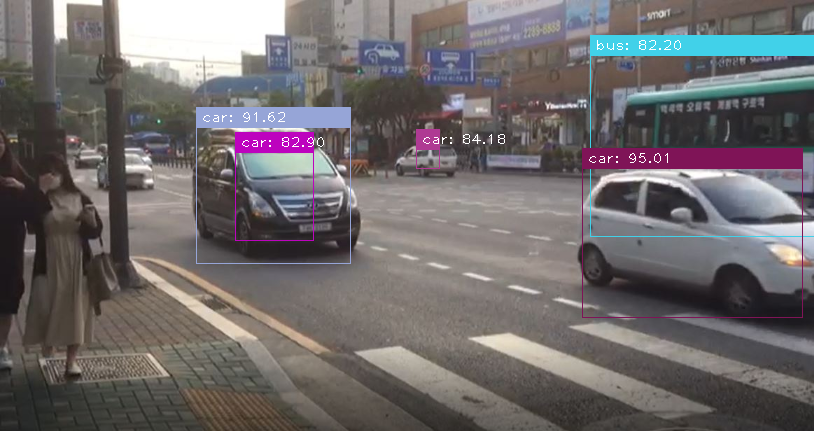

In [ ]:
# 결과 이미지 출력

font = cv2.FONT_HERSHEY_PLAIN                 # 폰트 설정

for i in range(len(boxes)):                   # 최종 선별된 Bbox 개수 만큼 반복
    if i in indexes:                          # 노이즈가 제거된 박스만 표시해 준다.
        x, y, w, h = boxes[i]
        label = "{}: {:.2f}".format(classes[class_ids[i]], confidences[i]*100)   # Class 이름, 신뢰도(확률) 표시
        #label = str(classes[class_ids[i]])   # Class 이름
        text_confidence = str(classes[class_ids[i]])+' '+'%.3f'%confidences[i]   # Class 신뢰도(확률) 표시
        print(i, text_confidence)
        #print(i, label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
        cv2.rectangle(img, (x, y - 20), (x + w, y), color, -1)
        cv2.putText(img, label, (x + 5, y - 5), font, 1, (255, 255, 255), 1)

cv2_imshow(img)